In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/osteoporosisfinal.csv')
print(data)

           Id  Age  Gender         Hormone FHistory              Race  \
0     1734616   69  Female          Normal      Yes             Asian   
1     1419098   32  Female          Normal      Yes             Asian   
2     1797916   89  Female  Postmenopausal       No         Caucasian   
3     1805337   78  Female          Normal       No         Caucasian   
4     1351334   38    Male  Postmenopausal      Yes  African American   
...       ...  ...     ...             ...      ...               ...   
1953  1991635   19  Female          Normal      Yes  African American   
1954  1528601   23  Female  Postmenopausal      Yes         Caucasian   
1955  1990957   34  Female  Postmenopausal       No  African American   
1956  1779848   25    Male  Postmenopausal       No  African American   
1957  1282963   26  Female  Postmenopausal       No  African American   

           Weight CalciumIn   Activity Smoking          MedCondition  \
0     Underweight       Low  Sedentary     Yes  Rhe

In [5]:
data_final = data.drop (["Id","Race","Medications"],axis = 1)
print(data_final)

      Age  Gender         Hormone FHistory       Weight CalciumIn   Activity  \
0      69  Female          Normal      Yes  Underweight       Low  Sedentary   
1      32  Female          Normal      Yes  Underweight       Low  Sedentary   
2      89  Female  Postmenopausal       No       Normal  Adequate     Active   
3      78  Female          Normal       No  Underweight  Adequate  Sedentary   
4      38    Male  Postmenopausal      Yes       Normal       Low     Active   
...   ...     ...             ...      ...          ...       ...        ...   
1953   19  Female          Normal      Yes       Normal  Adequate  Sedentary   
1954   23  Female  Postmenopausal      Yes  Underweight       Low     Active   
1955   34  Female  Postmenopausal       No  Underweight       Low  Sedentary   
1956   25    Male  Postmenopausal       No       Normal       Low  Sedentary   
1957   26  Female  Postmenopausal       No  Underweight  Adequate  Sedentary   

     Smoking          MedCondition Frac

<Axes: >

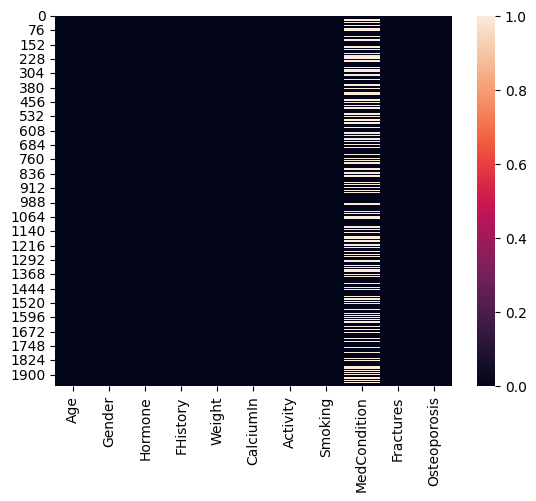

In [6]:
sns.heatmap(data_final.isnull())

      Age  Gender         Hormone FHistory       Weight CalciumIn   Activity  \
0      69  Female          Normal      Yes  Underweight       Low  Sedentary   
2      89  Female  Postmenopausal       No       Normal  Adequate     Active   
3      78  Female          Normal       No  Underweight  Adequate  Sedentary   
4      38    Male  Postmenopausal      Yes       Normal       Low     Active   
5      41    Male          Normal      Yes       Normal       Low     Active   
...   ...     ...             ...      ...          ...       ...        ...   
1952   23    Male  Postmenopausal       No       Normal       Low  Sedentary   
1953   19  Female          Normal      Yes       Normal  Adequate  Sedentary   
1955   34  Female  Postmenopausal       No  Underweight       Low  Sedentary   
1956   25    Male  Postmenopausal       No       Normal       Low  Sedentary   
1957   26  Female  Postmenopausal       No  Underweight  Adequate  Sedentary   

     Smoking          MedCondition Frac

<Axes: >

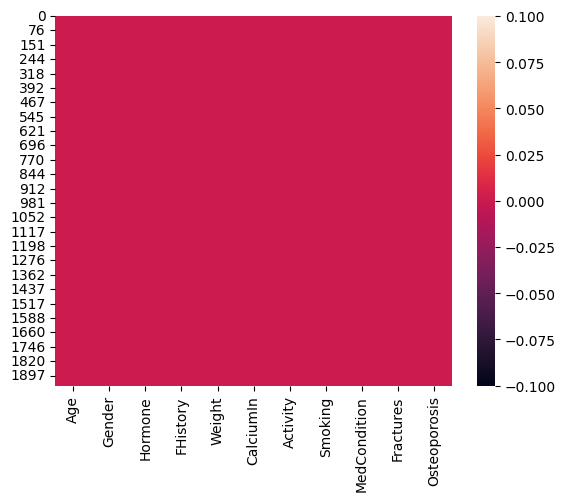

In [8]:
data_final = data_final.dropna()
print(data_final)
sns.heatmap(data_final.isnull()) #checking for Cleanliness of Data

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_final['Gender']= le.fit_transform(data_final['Gender'])
data_final['Hormone']= le.fit_transform(data_final['Hormone'])
data_final['FHistory']= le.fit_transform(data_final['FHistory'])
data_final['Weight']= le.fit_transform(data_final['Weight'])
data_final['CalciumIn']= le.fit_transform(data_final['CalciumIn'])
data_final['Activity']= le.fit_transform(data_final['Activity'])
data_final['MedCondition']= le.fit_transform(data_final['MedCondition'])
data_final['Fractures']= le.fit_transform(data_final['Fractures'])
data_final['Smoking']= le.fit_transform(data_final['Smoking'])


In [14]:
x = data_final.iloc[:,:-1].values
y = data_final.iloc[:,-1].values


In [15]:
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
print(x.shape)
print(x_test.shape)
print(x_train.shape)


(1311, 10)
(263, 10)
(1048, 10)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)


KNeighborsClassifier()

[[122   2]
 [ 37 102]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       124
           1       0.98      0.73      0.84       139

    accuracy                           0.85       263
   macro avg       0.87      0.86      0.85       263
weighted avg       0.88      0.85      0.85       263



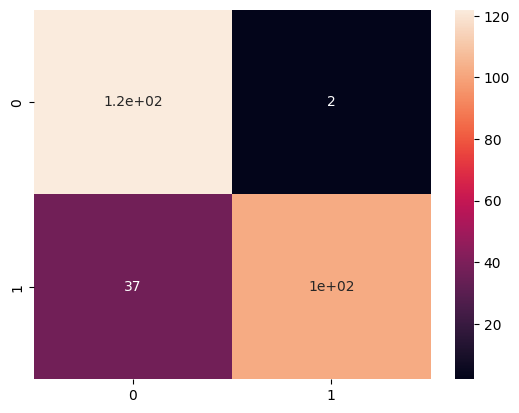

In [21]:
knn_pred = knn.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report
cmknn = confusion_matrix(y_test,knn_pred)
print(cmknn)
sns.heatmap(cmknn,annot=True)
print(classification_report(y_test,knn_pred))

In [22]:
crknn = classification_report(y_test,knn_pred)
print(crknn)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       124
           1       0.98      0.73      0.84       139

    accuracy                           0.85       263
   macro avg       0.87      0.86      0.85       263
weighted avg       0.88      0.85      0.85       263



In [24]:
from sklearn.linear_model import LogisticRegression
logm = LogisticRegression()
logm.fit(x_train,y_train)
logm.score(x_train,y_train)
logm.score(x_test,y_test)

0.8365019011406845

[[113  11]
 [ 32 107]]


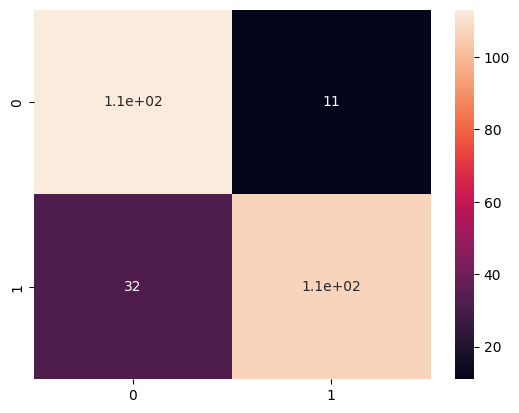

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       124
           1       0.91      0.77      0.83       139

    accuracy                           0.84       263
   macro avg       0.84      0.84      0.84       263
weighted avg       0.85      0.84      0.84       263



In [26]:
 logm_pred = logm.predict(x_test)
 cmlogm = confusion_matrix(y_test,logm_pred)
 print(cmlogm)
sns.heatmap(cmlogm,annot=True)
plt.show()
print(classification_report(y_test,logm_pred))